In [1]:
#import dependencies 
import pandas as pd
from bs4 import BeautifulSoup
import requests
import pymongo
from collections import Counter 
from splinter import Browser
executable_path = {"executable_path": "chromedriver.exe"}
browser = Browser("chrome", **executable_path, headless=False)
import time
import matplotlib.pyplot as plt

In [2]:
# visit the TDOJ death row page
death_url = 'https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html'
#call the browers and go to the url
browser.visit(death_url)

In [3]:
#grab the value in the browser
texas_html = browser.html
#convert to a beautiful soup object
texas_soup = BeautifulSoup(texas_html, 'html.parser')

In [4]:
#find the table object inside the soup object- set to variabel 
texas_table = texas_soup.find('table', class_='tdcj_table indent')

In [6]:

#gather url 
url5 = "https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html"

#read the url using pdread
tables = pd.read_html(url5)
#tables



In [9]:
#grab the first object in the tables variable 
df = tables[0]
#set to dataframe
df.columns = ['Execution', 'Link', 'Link', 'Last_Name', 'First_Name',
'TDCJ', 'Age', 'Date', 'Race', 'County']
#df

In [10]:
#group the data frame by race and find the count

grouped_race = df.groupby(['Race']).count()

In [11]:
#print the table grouped by race
grouped_race.head()

,Execution,Link,Link,Last_Name,First_Name,TDCJ,Age,Date,County
Race,,,,,,,,,
Black,203,203,203,203,203,203,203,203,203
Hispanic,106,106,106,106,106,106,106,106,106
Histpanic,1,1,1,1,1,1,1,1,1
Other,2,2,2,2,2,2,2,2,2
White,250,250,250,250,250,250,250,250,250


In [12]:
#group the data by date and count
grouped_date = df.groupby(['Date']).count()

In [13]:
#print the grouped table
#grouped_date

In [14]:
#average age of executed prisoner
df.Age.mean()

39.68149466192171

In [15]:
#find the youngest offender
df.Age.min()

24

In [16]:
#find the oldest prisoner
df.Age.max()

70

In [17]:
#find the number of unique names
df.First_Name.nunique()

266

In [18]:
#what is the most common first name of offenders
df['First_Name'].value_counts().idxmax()

'Robert'

In [19]:
#most common last name of offenders
df['Last_Name'].value_counts().idxmax()

'Johnson'

<class 'pandas.core.series.Series'>


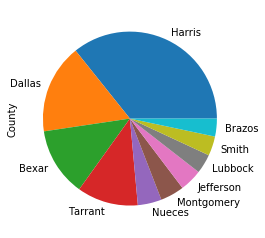

In [20]:
#lets find the most common county of execution an return the top ten values
#plot with matplotlib


countrys_by_executions = df['County'].value_counts()
countrys_by_executions
print(type(countrys_by_executions)) 


s = pd.Series(countrys_by_executions)
top_ten = s.nlargest(10)
top_ten.plot.pie()


plt.show()




In [21]:
#most common county of execution 
df['County'].value_counts().idxmax()

'Harris'

In [19]:
#group by age and get the count of the number of prisioners at that age
grouped_age = df.groupby(['Age']).count()

In [22]:
#print the grouped age table 
#grouped_age

In [23]:
#print the soup object
#print(texas_soup)

In [24]:
#find the a tags in the object

a_tags = browser.find_by_tag('a').first.value


In [25]:
#print the a tags
a_tags

''

In [27]:
#we need to create lists of all the links inside the offender table in order to use beautiful soup later
#create a list to append items to
list_of_items = []

#we are going to iterate over the table object
for a in texas_table.find_all('a', href=True):
    #take the a[href] to a link
    link = a['href']
    #take the link and append it to the 
    list_of_items.append(link)
    
    #print ("Found the URL:", a['href'])

In [28]:
# print off the list of items 
print(list_of_items)
# the items here in this list are partial strings of htmls
# we will need to use string comprehensive to take the partial strings and add them to the remaining of the url

['dr_info/swearingenlarry.html', 'dr_info/swearingenlarrylast.html', 'dr_info/kingjohn.html', 'dr_info/kingjohnlast.html', 'dr_info/_coble.jpg', 'dr_info/coblebillielast.html', 'dr_info/jenningsrobert.jpg', 'dr_info/jenningsrobertlast.html', 'dr_info/brazielalvin.html', 'dr_info/brazielalvinlast.html', 'dr_info/garciajoseph.html', 'dr_info/garciajosephlast.html', 'dr_info/_ramos.jpg', 'dr_info/ramosrobertlast.html', 'dr_info/ackerdaniel.html', 'dr_info/ackerdaniellast.html', 'dr_info/clarktroy.html', 'dr_info/clarktroylast.html', 'dr_info/youngchristopher.html', 'dr_info/youngchristopherlast.html', 'dr_info/bibledanny.html', 'dr_info/bibledannylast.html', 'dr_info/castillojuan.html', 'dr_info/castillojuanlast.html', 'dr_info/davilaerick.html', 'dr_info/davilaericklast.html', 'dr_info/rodriguezrosendo.html', 'dr_info/rodriguezrosendolast.html', 'dr_info/battagliajohn.html', 'dr_info/battagliajohnlast.html', 'dr_info/rayfordwilliam.html', 'dr_info/rayfordwilliamlast.html', 'dr_info/shore

In [29]:
#create new list
new_list = []
#take the partial string missing in the list in the prior cell
s = "https://www.tdcj.texas.gov/death_row/"
# for loop thorugh the existing list
for i in list_of_items:
    #take the partial string in the list
    new = s+str(i)
    #add the two strings together after convering i to a string
    new_list.append(new)
    #add to the new list and 
    print(new)

https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html
https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html
https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html
https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html
https://www.tdcj.texas.gov/death_row/dr_info/_coble.jpg
https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html
https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobert.jpg
https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html
https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html
https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html
https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html
https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html
https://www.tdcj.texas.gov/death_row/dr_info/_ramos.jpg
https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html
https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html
https://www.tdcj.texas.gov/death_row/dr_inf

In [30]:
# print the new list--note that several of the items have death_row//death_row/ instead of death_row/death_row/
new_list

['https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/_coble.jpg',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobert.jpg',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/_ramos.jpg',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ac

In [31]:
html_links=[]
jpeg_links=[]

#note that each offender has two or three  links, one with just their names and the #
#second with the word jpeg and then a third with their last words 
for link in new_list:
    #if the string URL contains hrml append to html links
    if "html" in link: 
        html_links.append(link)
    else:
        #otherwise send to jpeg links
        jpeg_links.append(link)
            
            
        
    

In [32]:

html_links

['https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html',
 'https://www.tdcj.texas.gov/death_ro

In [33]:
#take the results in html links, create an text file, iterate through the list and write each item to the text doc. 
with open('html_links.txt', 'w') as f:
    for item in html_links:
        f.write("%s\n" % item)

In [34]:
#take the results in jpeg links, create an text file, iterate through the list and write each item to the text doc. 

with open('jpeg_links.txt', 'w') as f:
    for item in jpeg_links:
        f.write("%s\n" % item)



In [35]:
#there are prisoners who did not give a statement, these are dead links, we are going to remove them 

dead_links = []
final_statements = []

#go through html links 
for link in html_links:
    #remove html stings with the word no_ in them
    if "no_" in link: 
        dead_links.append(link)
        #if no exists put it to the dead links list
    else:
        #otherwise append to final statements 
        final_statements.append(link)
            


In [36]:
#print the list
final_statements

['https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html',
 'https://www.tdcj.texas.gov/death_ro

In [37]:
typos = []
final_final_statements = []
#the typos from the previous list which includes death_row//death_row, we want to take those off as it will throw and error
#when we try to vist that website 
for link in final_statements:
    
    if "death_row//death_row" in link: 
        typos.append(link)
    else:
        final_final_statements.append(link)
            

In [38]:
typos

['https://www.tdcj.texas.gov/death_row//death_row/dr_info/cardenasrubenlast.html',
 'https://www.tdcj.texas.gov/death_row//death_row/dr_info/pruettrobert.html',
 'https://www.tdcj.texas.gov/death_row//death_row/dr_info/pruettrobertlast.html']

In [39]:
#this is a list of last statements and prisoner information it is not a list of final statements we are almost there. 
final_final_statements

['https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarrylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html',
 'https://www.tdcj.texas.gov/death_ro

In [40]:

# we only want links which deather their "last" statement so we want to strip out the superfulious links 

others = []
last_statements = []
for link in final_final_statements:
    
    if "last.html" in link: 
        last_statements.append(link)
    else:
        others.append(link)

In [41]:
others

['https://www.tdcj.texas.gov/death_row/dr_info/swearingenlarry.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/youngchristopher.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/bibledanny.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/castillojuan.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/davilaerick.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/rodriguezrosendo.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/battagliajohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/rayfordwilliam.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/shoreanthony.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/cardenasrube

In [42]:
statements_final = []
counter = 0

#the counter is the number of inmates on the list
for link in last_statements:
    #loop though the list- when we hit 562- stop
    if counter == 562:
        break
    #visit the browser
    browser.visit(link)
    html1 = browser.html
    soup1 = BeautifulSoup(html1, 'html.parser')
      #find all the p tags in the BS object
    page = soup1.find_all("p")
    
    #take each object and convert to string    
    statement = str(page)
    test1 = BeautifulSoup(statement)
    clean = test1.get_text()
    #we want the text of that string by removing the other p tags
    
   
   #append to our list and add one to the counter 
    statements_final.append(clean)
    counter += 1
    
    

In [43]:
#print our list and what type it is
print(statements_final)
print(type(statements_final))
#convert it to string
allstatements = str(statements_final)
#print
print(allstatements)


['[Date of Execution:  , August 21, 2019,  Offender:,  Swearingen, Larry #999361, Last Statement:, Lord forgive them.  They don’t know what they are doing]', '[Date of Execution:, April 24, 2019  , Offender:, John William King, TDCJ #999295, Last Statement:, Spoken: No., Written Statement: Capital Punishment: Them without the capital get the punishment.]', '[Date of Execution:, February 28, 2019  , Offender:, Billie Wayne Coble, TDCJ #000976, Last Statement:, Yes Sir, that will be five Dollars I love you, I love  you, and I love you. Mike I love you. Where’s Nelley at? I love you. That will  be five dollars. Take Care.”]', '[Date of Execution:,  January 30, 2019,  Offender:  , Robert Mitchell Jennings, Last Statement:  , To my friends and family it was a nice journey. To the  family of the police officer I hope this finds you peace and be well and stay  safe. Enjoy life’s moments because we never get them back.]', '[Date of Execution:,  December 11, 2018,  Offender:  , Alvin Avon Brazi

In [44]:
#convert to string and print
mystring = str(statements_final)
print(mystring)

#sent entire object to beautiful soup 
soup = BeautifulSoup(mystring)
#get the text from the BS object
print(soup.get_text())

['[Date of Execution:  , August 21, 2019,  Offender:,  Swearingen, Larry #999361, Last Statement:, Lord forgive them.  They don’t know what they are doing]', '[Date of Execution:, April 24, 2019  , Offender:, John William King, TDCJ #999295, Last Statement:, Spoken: No., Written Statement: Capital Punishment: Them without the capital get the punishment.]', '[Date of Execution:, February 28, 2019  , Offender:, Billie Wayne Coble, TDCJ #000976, Last Statement:, Yes Sir, that will be five Dollars I love you, I love  you, and I love you. Mike I love you. Where’s Nelley at? I love you. That will  be five dollars. Take Care.”]', '[Date of Execution:,  January 30, 2019,  Offender:  , Robert Mitchell Jennings, Last Statement:  , To my friends and family it was a nice journey. To the  family of the police officer I hope this finds you peace and be well and stay  safe. Enjoy life’s moments because we never get them back.]', '[Date of Execution:,  December 11, 2018,  Offender:  , Alvin Avon Brazi

In [45]:

  
# split() returns list of all the words in the string 
split_it = allstatements.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(50) 
  
print(most_occur) 

[('I', 3414), ('to', 1628), ('and', 1369), ('the', 1286), ('you', 1184), ('of', 1169), ('my', 894), ('for', 835), ('that', 746), ('love', 720), (',', 618), ('all', 553), ('am', 519), ('a', 511), ('have', 509), ('is', 495), ('in', 485), ('Last', 458), ('me', 388), ('Statement:,', 350), ('Execution:,', 335), ('your', 321), ('know', 315), ('not', 314), ('will', 313), ('be', 306), ('Offender:,', 298), ('this', 277), ('you.', 271), ('it', 246), ('would', 242), ('want', 242), ('like', 236), ('with', 236), ("'[Date", 231), ('what', 212), ('me.', 212), ('"[Date', 205), ('on', 197), ('are', 183), ('was', 180), (']",', 179), ('family', 176), ('thank', 176), ('but', 172), ('God', 171), ('Offender:', 158), ('hope', 158), ('just', 148), ('To', 147)]


In [46]:
print(type(most_occur))

print(type(most_occur)) 

<class 'list'>
<class 'list'>


In [47]:
words = []
counts = []
for item in most_occur:
    words.append(item[0])
    counts.append(item[1])
    #print(item[1])
    
    
    
    #print(item)
    
    
    #word = most_occur[0]
    #words.append(word)
    #counts1 = most_occur[0][1]
    #counts.append(counts1)
        



#most_occur[0]
#most_occur[0][0]

In [50]:
#print our list of words
print(words)
#print our list of counts 
print(counts)

['I', 'to', 'and', 'the', 'you', 'of', 'my', 'for', 'that', 'love', ',', 'all', 'am', 'a', 'have', 'is', 'in', 'Last', 'me', 'Statement:,', 'Execution:,', 'your', 'know', 'not', 'will', 'be', 'Offender:,', 'this', 'you.', 'it', 'would', 'want', 'like', 'with', "'[Date", 'what', 'me.', '"[Date', 'on', 'are', 'was', ']",', 'family', 'thank', 'but', 'God', 'Offender:', 'hope', 'just', 'To']
[3414, 1628, 1369, 1286, 1184, 1169, 894, 835, 746, 720, 618, 553, 519, 511, 509, 495, 485, 458, 388, 350, 335, 321, 315, 314, 313, 306, 298, 277, 271, 246, 242, 242, 236, 236, 231, 212, 212, 205, 197, 183, 180, 179, 176, 176, 172, 171, 158, 158, 148, 147]


In [51]:
#this is the top 50 most common words
len(words)

50

In [52]:
len(counts)

50

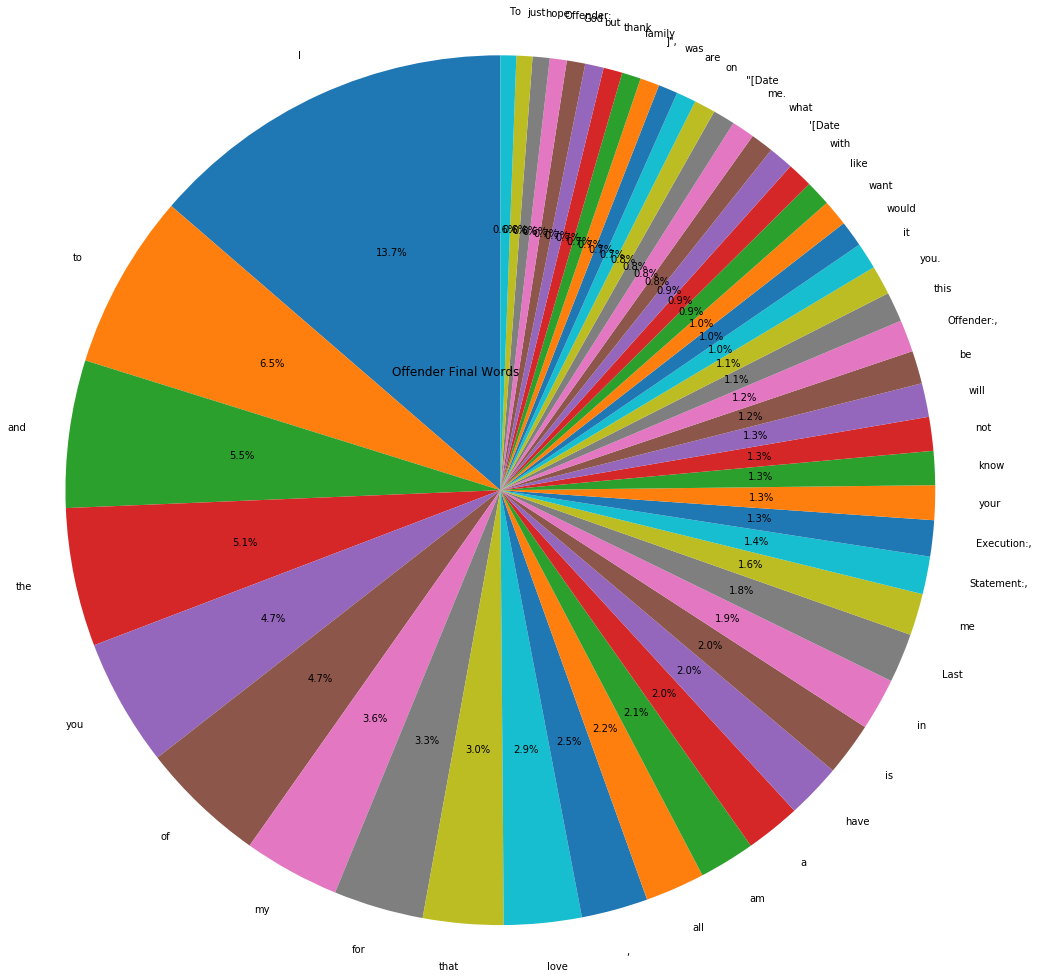

In [55]:
most_spoken = counts
final_words = words

plt.pie(most_spoken, labels=final_words, startangle=90, autopct='%.1f%%', radius=5)
plt.title('Offender Final Words', loc= "left")
plt.show()